## Reading the dataset

We will focus on only one stock 'BHEL' as each stock has its own profile. We read data from the local MongoDB that was set up in the data sourcing step. We get all features for the exploration.

In [1]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/?readPreference=primary&appname=MongoDB+Compass&directConnection=true&ssl=false')
filter={}
collection = client['niftyfifty']['stock-data']
bheldata = []
data = collection.find({'Stock': {"$eq" : 'BHEL'}},{'_id':0})
bheldata = [d for d in data]


We import the pandas library for data handling. We make a DataFrame object from the BHEL data. df.head() shows the first 5 records.

In [2]:
import pandas as pd
df = pd.DataFrame(bheldata)
df.head()

,Date,Stock,Close,RSI,Beta,ema10,ema20,ema50,posDI,negDI,ADX
0,2021-03-25,BHEL,48.20,49.217338,1.14,50.620095,49.984186,44.359176,13.521698,27.052287,25.770266
1,2021-03-26,BHEL,48.70,49.217338,1.14,50.316442,49.885692,44.539209,11.795044,26.153730,26.632177
2,2021-03-30,BHEL,48.95,49.217338,0.96,50.031634,49.777531,44.704338,11.387699,25.648988,27.480296
3,2021-03-31,BHEL,48.75,49.217338,0.95,50.198610,49.889194,44.949266,11.377414,24.695203,28.154517
4,2021-04-01,BHEL,50.95,49.217338,0.98,49.980681,49.804509,45.108118,14.616430,23.022029,27.738656


Next, we make the Date column index to easily extract time related data easily.

In [32]:
df.index = df.Date
df = df.drop('Date',axis=1)
df

,Close
Date,
2021-03-25,48.20
2021-03-26,48.70
2021-03-30,48.95
2021-03-31,48.75
2021-04-01,50.95
...,...
2022-03-16,51.20
2022-03-17,51.40
2022-03-21,50.70


We use the describe function provided on a DataFrame object. It tells us that there are 246 records for BHEL. All the features have a wide variety of ranges but they are somewhat around the range of closing price. Except RSI, which is supposed to be between 0 and 100.

In [4]:
df.describe()

,Close,RSI,Beta,ema10,ema20,ema50,posDI,negDI,ADX
count,246.000000,2.460000e+02,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,60.244309,4.921734e+01,1.335041,60.258229,60.211072,59.288053,20.860178,23.013785,28.826591
std,7.923283,1.993576e-13,0.106129,7.231859,6.494682,5.854876,8.132417,7.977589,10.380289
min,44.050000,4.921734e+01,0.950000,46.176652,47.276613,44.359176,7.371711,2.989061,13.692280
25%,54.462500,4.921734e+01,1.270000,54.799141,55.562267,57.428505,15.528997,18.526745,21.183658
50%,60.050000,4.921734e+01,1.330000,60.515116,60.479685,61.090308,19.229109,24.487717,27.008543
75%,65.637500,4.921734e+01,1.390000,66.114449,66.015648,63.816423,24.670752,28.589183,35.500837
max,77.000000,4.921734e+01,1.600000,74.451040,71.733582,65.963814,49.214268,46.865471,59.489459


Let's plot the EMA (moving averages) for periods of 10, 20 and 50 for the data. It results in smoothening of the data. The higher the period, the lesser the peaks and valleys of the data.

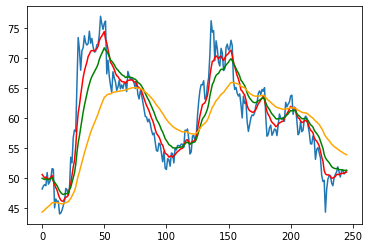

In [9]:
from matplotlib import pyplot

series = df.Close
series.plot()
df.ema10.plot(color='red')
df.ema20.plot(color='green')
df.ema50.plot(color='orange')
pyplot.show()

# series[:100].plot()
# rolling_mean[:100].plot(color='red')
# pyplot.show()

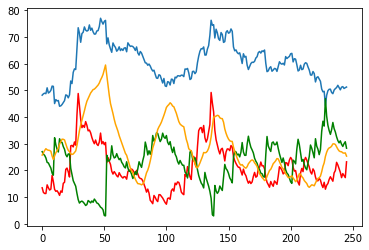

In [10]:
from matplotlib import pyplot

series = df.Close
series.plot()
df.posDI.plot(color='red')
df.negDI.plot(color='green')
df.ADX.plot(color='orange')
pyplot.show()

# series[:100].plot()
# rolling_mean[:100].plot(color='red')
# pyplot.show()

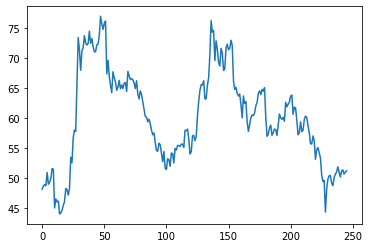

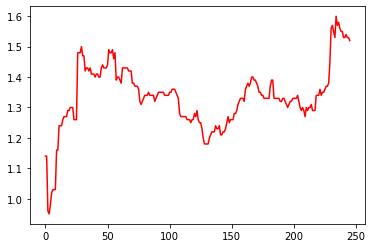

In [16]:
df.Close.plot()
pyplot.show()

df.Beta.plot(color='red')
pyplot.show()